In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def get_weight(error_rate):
  return np.log((1-error_rate)/error_rate)
  

In [3]:
weights = []
for i in range(1, 100):
  err_rate = i/100
  weight = get_weight(err_rate)
  weights.append(weight)
  

Text(0.5, 1.0, 'Comparing weights for base learners with varying error rates')

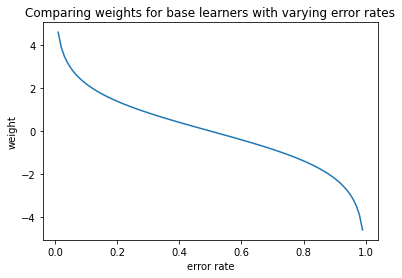

In [6]:
plt.plot([i/100 for i in range(1,100)], weights)
plt.xlabel('error rate')
plt.ylabel('weight')
plt.title('Comparing weights for base learners with varying error rates')